<a href="https://colab.research.google.com/github/MAU143429/IA-Laboratorios/blob/gradiente/Laboratorio_Descenso_del_Gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Laboratorio Descenso del Gradiente

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from numpy.linalg import norm
%matplotlib inline
from mpl_toolkits import mplot3d
from typing import Callable
from sympy import *
import random

1. Según tales funciones, grafique las funciones usando la función meshgrid.


a.  $f_1\:\left(x_1,\:x_2\right)\:=\:\left(x_1\:-\:0,7\right)^2\:+\:\left(x_2\:-\:0,5\:\right)^2\:con\:x_1,\:x_2\:∈\:\left[-4,\:4\right].$

In [57]:

def plot_meshgrid(f: Callable[[np.ndarray, np.ndarray], np.ndarray], x1_range: np.ndarray, x2_range: np.ndarray, title: str):
  x1, x2 = np.meshgrid(x1_range, x2_range)
  z = f(x1, x2)
  fig = plt.figure(figsize=(15, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x1, x2, z, alpha=0.85)
  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')
  ax.set_title(title)

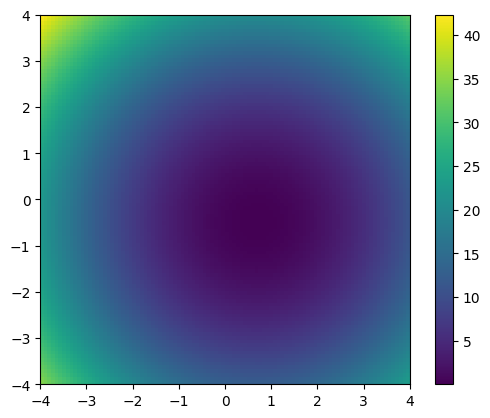

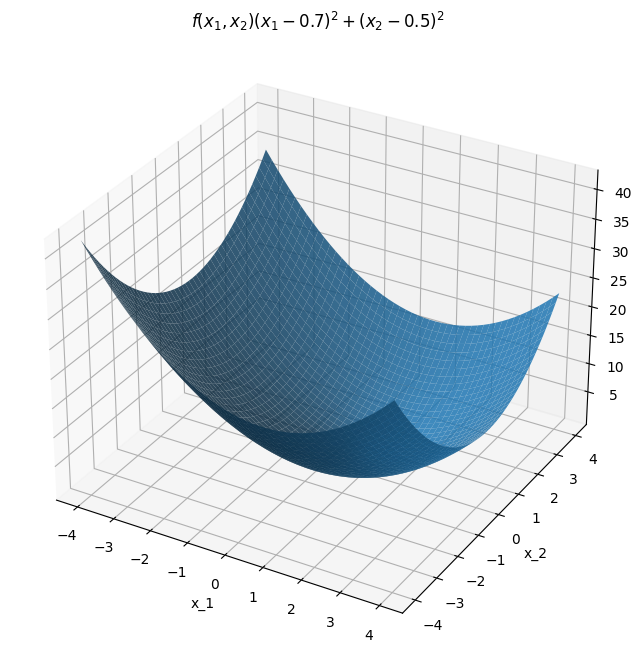

In [58]:
x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-4, 4, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = (X1-0.7)**2 + (X2-0.5)**2

plt.imshow(Z, cmap='viridis', extent=[-4, 4, -4, 4])
plt.colorbar()
plt.show()


x1_range = np.linspace(-4, 4)
x2_range = np.linspace(-4, 4)

def f1_function(x1: np.ndarray, x2: np.ndarray):
  return (x1-0.7)**2 + (x2 - 0.5)**2

plot_meshgrid(f1_function, x1_range, x2_range, "$f(x_1,x_2)(x_1-0.7)^2 + (x_2 - 0.5)^2 $")


b. $f_2\:\left(x_1,\:x_2\right)\:=\:x_1𝑒^{\left(−x_1^2−x_2^2\right)}con\:x_1,\:x_2\:∈\left[-2,\:2\right].$ 

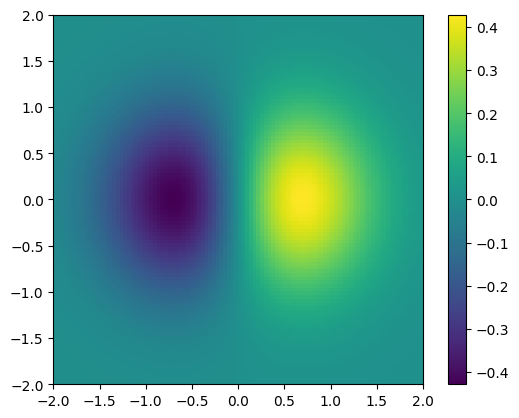

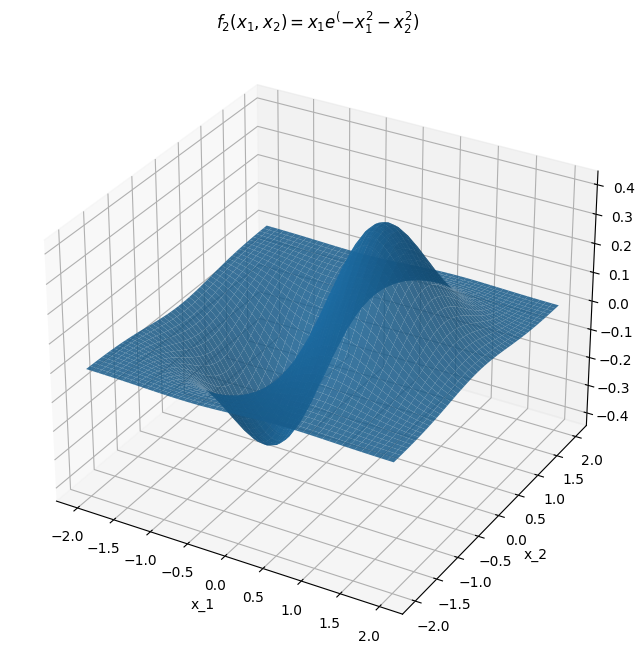

In [59]:
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = X1 * np.exp(-X1**2 - X2**2)

plt.imshow(Z, cmap='viridis', extent=[-2, 2, -2, 2])
plt.colorbar()
plt.show()

x1_range = np.linspace(-2, 2)
x2_range = np.linspace(-2, 2)

def f2_function(x1: np.ndarray, x2: np.ndarray):
  return x1 * np.exp(-x1**2 - x2**2)

plot_meshgrid(f2_function, x1_range, x2_range, "$f_2(x_1,x_2) = x_1 e^(-x_1^2 - x_2^2) $")

2. Implemente el algoritmo del descenso del gradiente, para cada función.


A. Calcule paso a paso la derivada parcial. (20 pts)


### 2.1  $f_1\:\left(x_1,\:x_2\right)\:=\:\left(x_1\:-\:0,7\right)^2\:+\:\left(x_2\:-\:0,5\:\right)^2\:con\:x_1,\:x_2\:∈\:\left[-4,\:4\right].$

Para simplifcar el calculo se va a tomar $x_1$ como $x$ y $x_2$ como $y$

Primero se calcula la derivada parcial de $x$:

$\frac{\partial :}{\partial :x}((x-0.7)^2 + (y - 0.5)^2)$

Desarollando el producto notable de cada expresion:

$= \frac{\partial :}{\partial :x} (x^2 - 1.4x + y^2 + 0.74 - y)$

Derivamos respecto a $x$

$= 2 \cdot x - 1.4 = 2 \cdot x_1 - 1.4$

Ahora calculamos la derivada parcial de $y$":

$\frac{\partial :}{\partial :y}((x-0.7)^2 + (y - 0.5)^2)$

Desarollando el producto notable de cada expresion:

$= \frac{\partial :}{\partial :x} (x^2 - 1.4x + y^2 + 0.74 - y)$

Derivamos respecto a $y$

$= 2 \cdot y - 1 = 2 \cdot x_2 - 1$

          
            
### 2.2 $f_2\:\left(x_1,\:x_2\right)\:=\:x_1𝑒^{\left(−x_1^2−x_2^2\right)}con\:x_1,\:x_2\:∈\left[-2,\:2\right].$ 

Para efectos de simplicidad, vamos a tomar $x_1$ como $x$ y $x_2$ como $y$

Primero vamos a calcular la derivada parcial de x por lo que:

$\frac{\partial \:}{\partial \:x}\left(x\cdot \:e^{\left(−x^2−y^2\right)}\right)$

Vamos a aplicar la regla del producto tal que

$\quad \left(f\cdot g\right)'=f\:'\cdot g+f\cdot g'$

con 

$f=x $ y $\:g=e^{-x^2-y^2}$ aplicando esto tenemos.



$\frac{\partial \:}{\partial \:x}\left(x\right)e^{-x^2-y^2}+\frac{\partial \:}{\partial \:x}\left(e^{-x^2-y^2}\right)x$


Calculando las derivadas parciales por aparte quedaría.

$\frac{\partial \:}{\partial \:x} \left(x\right) = 1  $

$\frac{\partial \:}{\partial \:x}\left(e^{-x^2-y^2}\right) = -2e^{-x^2-y^2}x$


Sustituyendo esto nos quedaría que:

$1\cdot \:e^{-x^2-y^2}+\left(-2e^{-x^2-y^2}x\right)x$


Concluyendo que:

$\frac{\partial \:}{\partial \:x}\left(xe^{\left(-x^2-y^2\right)}\right)=e^{-x^2-y^2}-2e^{-x^2-y^2}x^2$


Luego obtendremos la derivada parcial de y:

$\frac{\partial \:}{\partial \:y}\left(x\cdot \:e^{\left(−x^2−y^2\right)}\right)
$

Comenzamos sacando la x de la derivada parcial, ya que en este caso x interactua como una constante, obteniendo lo siguiente

$x\frac{\partial \:}{\partial \:y}\left(e^{-x^2-y^2}\right)$

Luego aplicamos regla de la cadena para obtener que 

$xe^{-x^2-y^2}\frac{\partial \:}{\partial \:y}\left(-x^2-y^2\right)$

Resolviendo la derivada parcial tenemos que:

$\frac{\partial \:}{\partial \:y}\left(-x^2-y^2\right) = -2y$

Sustituyendo esto nos quedaría que:

$xe^{-x^2-y^2}\left(-2y\right)$

Concluyendo que:

$\frac{\partial \:}{\partial \:y}\left(xe^{\left(-x^2-y^2\right)}\right)=-2e^{-x^2-y^2}xy$


Teniendo esto ya podemos obtener el vector nabla de $f$ para aplicarle el algortimo de descenso de gradiente.

$∇f\:=\begin{pmatrix}\frac{\partial f}{\partial x}\\ \frac{\partial f}{\partial y}\end{pmatrix}$

$∇f\:=\begin{pmatrix}e^{-x^2-y^2}-2e^{-x^2-y^2}x^2\\ -2e^{-x^2-y^2}xy\end{pmatrix}$

B. Escoja un coeficiente de aprendizaje 𝛼 que permita la convergencia y
reporte los datos y resultados para 100 corridas al menos. (65 pts)
i. 

*   Programe el algoritmo del descenso del gradiente para las funciones dadas al inicio de este documento.
*   Indique la cantidad de iteraciones necesarias para converger, en
caso de hacerlo dentro de esas cien corridas
*   Despliegue el punto de convergencia llegado, de igual forma
despliegue el punto al que se llegó en las iteraciones si no se pudo
converger
*   Reporte si convergió al punto correcto o no
*   Escoja una de las corridas y en una gráfica muestre los puntos
probados por el algoritmo.





Aplicando el algoritmo a la función a.

El punto de convergencia es (0.7000, 0.5000)
Se necesitaron 86 iteraciones para converger


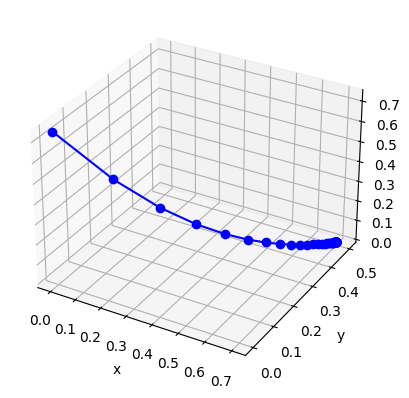

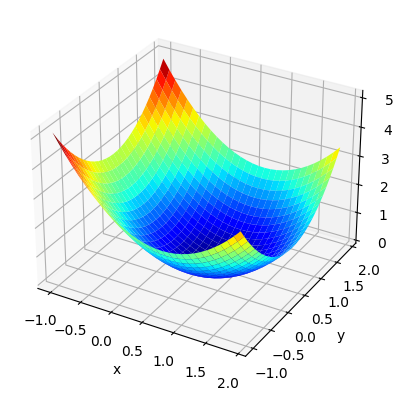

In [71]:
'''
Algoritmo del descenso del gradiente.

'''
def objective_function(x):
    return (x[0] - 0.7)**2 + (x[1] - 0.5)**2

def gradient_function(x):
    return [2*(x[0] - 0.7), 2*(x[1] - 0.5)]

def gradient_descent(gradient_function, initial_point, learning_rate, max_iterations):
    current_point = initial_point
    points = [initial_point]
    errors = [math.sqrt((current_point[0] - 0.7)**2 + (current_point[1] - 0.5)**2)]
    
    for i in range(max_iterations):
        gradient = gradient_function(current_point)
        current_point = [current_point[j] - learning_rate*gradient[j] for j in range(len(current_point))]
        points.append(current_point)
        errors.append(math.sqrt((current_point[0] - 0.7)**2 + (current_point[1] - 0.5)**2))
        
        if all(abs(gradient[j]) < 1e-8 for j in range(len(current_point))):
            return points, errors, current_point, i+1
        
    return points, errors, current_point, max_iterations


def plot(learning_rate):
  initial_point = [0, 0]
  max_iterations = 100

  points, errors, converged_point, num_iterations = gradient_descent(gradient_function, initial_point, learning_rate, max_iterations)

  print(f"El punto de convergencia es ({converged_point[0]:.4f}, {converged_point[1]:.4f})")
  print(f"Se necesitaron {num_iterations} iteraciones para converger")

  x_values = [point[0] for point in points]
  y_values = [point[1] for point in points]
  z_values = [objective_function(point) for point in points]

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(x_values, y_values, z_values, 'bo-')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  x = y = np.arange(-1.0, 2.0, 0.1)
  X, Y = np.meshgrid(x, y)
  zs = np.array([objective_function([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
  Z = zs.reshape(X.shape)
  ax.plot_surface(X, Y, Z, cmap='jet')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()

learning_rate = 0.1
plot(learning_rate)





Aplicando el algoritmo a la función b.

El punto de convergencia es (-0.7057, 0.0483)
Se necesitaron 100 iteraciones para converger


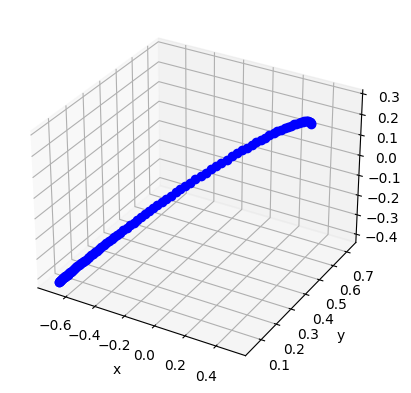

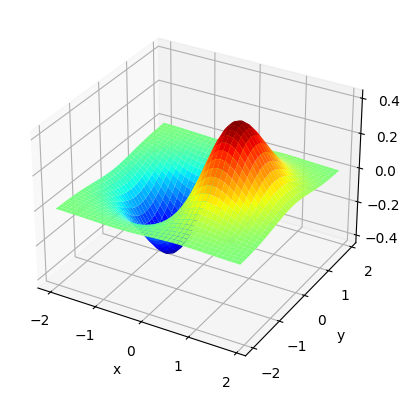

In [70]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def objective_function2(x):
    return x[0] * math.exp(-((x[0])**2 + (x[1])**2))

def gradient_function2(x):
    return [(1 - 2*(x[0])**2)*math.exp(-((x[0])**2 + (x[1])**2)), -2*x[0]*x[1]*math.exp(-((x[0])**2 + (x[1])**2))]

def gradient_descent2(gradient_function, initial_point, learning_rate, max_iterations):
    current_point = initial_point
    points = [initial_point]
    errors = [abs(objective_function2(current_point))]
    
    for i in range(max_iterations):
        gradient = gradient_function2(current_point)
        current_point = [current_point[j] - learning_rate*gradient[j] for j in range(len(current_point))]
        points.append(current_point)
        errors.append(abs(objective_function2(current_point)))
        
        if all(abs(gradient[j]) < 1e-8 for j in range(len(current_point))):
            return points, errors, current_point, i+1
        
    return points, errors, current_point, max_iterations


def plot2(learning_rate):

  initial_point = [0.5, 0.5]
  max_iterations = 100

  points, errors, converged_point, num_iterations = gradient_descent2(gradient_function, initial_point, learning_rate, max_iterations)

  print(f"El punto de convergencia es ({converged_point[0]:.4f}, {converged_point[1]:.4f})")
  print(f"Se necesitaron {num_iterations} iteraciones para converger")

  x_values = [point[0] for point in points]
  y_values = [point[1] for point in points]
  z_values = [objective_function2(point) for point in points]

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(x_values, y_values, z_values, 'bo-')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  x = y = np.arange(-2.0, 2.0, 0.1)
  X, Y = np.meshgrid(x, y)
  zs = np.array([objective_function2([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
  Z = zs.reshape(X.shape)
  ax.plot_surface(X, Y, Z, cmap='jet')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()



learning_rate = 0.05
plot2(learning_rate)

C. Escoja un 𝛼 relativamente grande respecto al valor seleccionado y aplique
el punto 2.b para este valor 

*   ¿Qué sucede? ¿Permite un 𝛼 muy grande la convergencia?
*   Saque conclusiones


El punto de convergencia es (0.7000, 0.5000)
Se necesitaron 2 iteraciones para converger


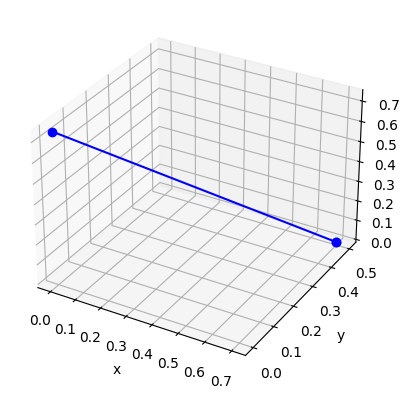

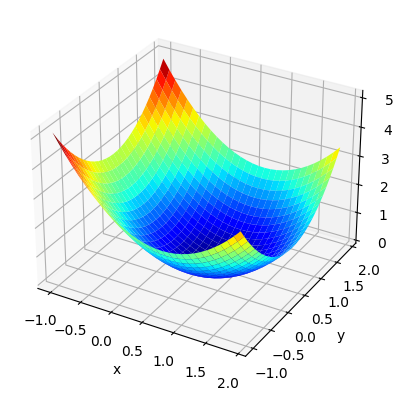

El punto de convergencia es (-0.7071, 0.0006)
Se necesitaron 100 iteraciones para converger


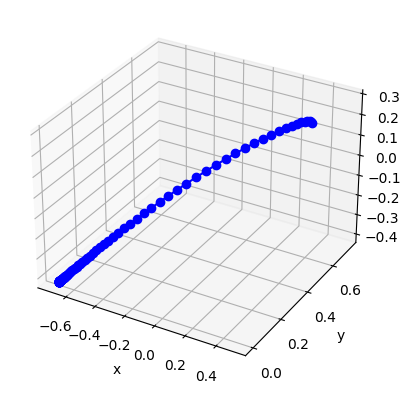

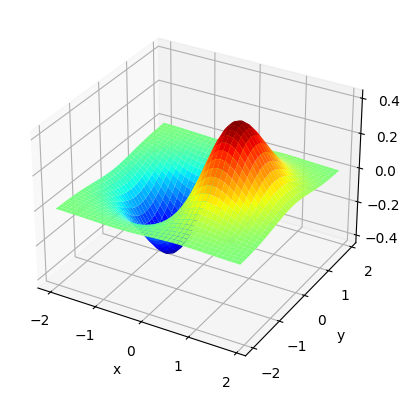

In [72]:
# Se aumenta de 0.1 a 0.5 para la ecuación A

learning_rate = 0.5
plot(learning_rate)

# Se aumenta de 0.05 a 0.1 para la ecuación B

learning_rate = 0.1
plot2(learning_rate)


D. Escoja un 𝛼 relativamente pequeño respecto al valor seleccionado y
aplique el punto 2.b para este valor
*   ¿Qué sucede? ¿Permite un 𝛼 muy pequeño la convergencia?
*   Saque conclusiones

El punto de convergencia es (0.7000, 0.5000)
Se necesitaron 100 iteraciones para converger


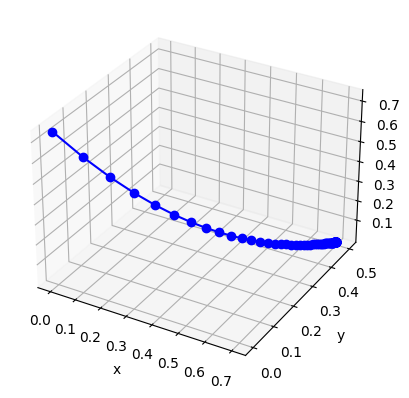

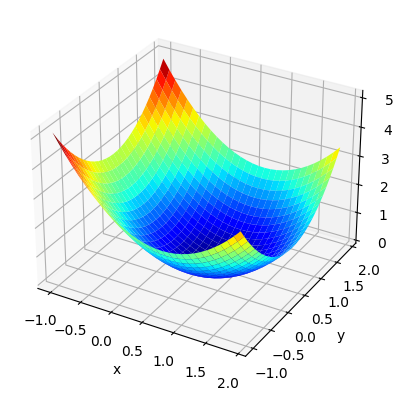

El punto de convergencia es (0.0198, 0.7094)
Se necesitaron 100 iteraciones para converger


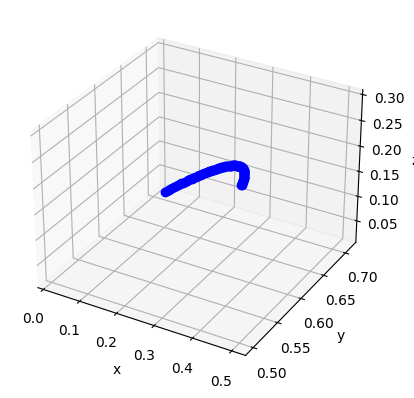

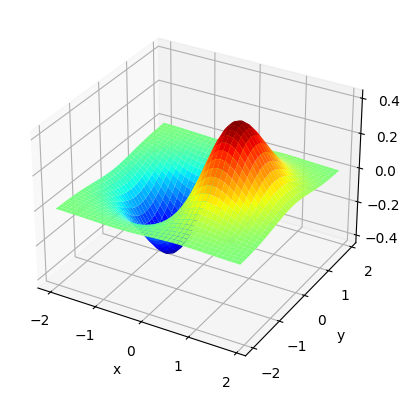

In [73]:
# Se disminuye de 0.1 a 0.05 para la ecuación A

learning_rate = 0.05
plot(learning_rate)

# Se disminuye de 0.05 a 0.01 para la ecuación A

learning_rate = 0.01
plot2(learning_rate)



## Conclusiones


1.   Cuando se aumenta el valor del learning rate observamos que el resultado obtenido se obtiene en pocas iteraciones sin embargo el valor es poco preciso, esto se debe a que el coeficiente de aprendizaje al ser mayor permite que el algoritmo de pasos más grandes entre una iteracióin y la otra, lo que proporciona rapidez pero esto afecta la precisión del resultado final.

2.   Por otro lado cuando se disminuye el valor del learning rate obtenemos un mayor número de iteraciones hasta llegar al resultado, lo que ocasiona que el algoritmo se vea relentizado, sin embargo al tener un coefieciente de aprendizaje pequeño logra que al final de las iteaciones obtengamos un resultado más preciso.

